Kanishk Mair (kmair@andrew.cmu.edu)
Date: 2018-10-08 23:51:22.594329


- ASSIGNMENT: bvp-1
- POINTS: 2
- CATEGORY: homework
- RUBRIC: default
- RUBRIC_CATEGORIES: technical, presentation
- RUBRIC_WEIGHTS: 0.8, 0.2
- DUEDATE: 2018-10-09 23:59:59
- GRADER: Noriyuki Yoshio


The flow of an incompressible fluid between two solid plates and driven by a pressure drop is given by:

$\frac{d^2 v}{dy^2} = \frac{\Delta P}{\mu L}$

where v(y) is the velocity in the flow direction (x) as a function of position between the plates. The fluid is glycerol with a viscosity $\mu = 0.9$ Pa-s., the gap between the plates is 0.5 mm and the pressure drop $\frac{\Delta P}{L}$ is 200 MPa / m.  Calculate the velocity profile using solve\_bvp for the situation that (a) both plates are stationary and (b) for the situation that the upper plate is stationary and the bottom plate is moving at 10 m/s in the opposite direction as the pressure drop; plot these together on the same plot.



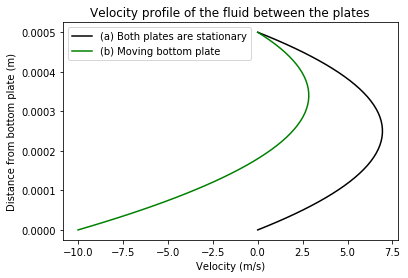

In [3]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

dPL = 200 * 10**6  # Pa/m
mu = 0.9           # Pa-s
d = 5 * 10**(-4)   # m

def diff(y, v):
    v1, v2 = v
    dv1dy = v2
    dv2dy = -np.ones(y.shape) * dPL / mu
    return [dv1dy, dv2dy]

'(a)'
# Initial Boundary conditions have v1 at boundary = 0

def bc1(vl, vu):
    v1l, v2l = vl
    v1u, v2u = vu
    return [v1l, v1u]

# Assuming the guess as sinusodial equation 

y = np.linspace(0, d)
V1a = np.sin(y/d * np.pi)
V2a = np.gradient(V1a, y, edge_order=2)
Va = np.array([V1a, V2a])

sol = solve_bvp(diff, bc1, y, Va)
vel1 = sol.y[0]
acc = sol.y[1]
plt.plot(vel1, y, 'k', label = '(a) Both plates are stationary')

'(b)'
# Initial Boundary conditions have v1 at bottom = -10 (-ve, since it's in opposite direction) and at top = 0

def bc2(vl, vu):
    v1l, v2l = vl
    v1u, v2u = vu
    return [v1l + 10, v1u]

# Guessing a quadratic function

V1b = 10 * (1- (y/d)**2)
V2b = np.gradient(V1b, y, edge_order=2)
Vb = np.array([V1b, V2b])

ans = solve_bvp(diff, bc2, y, Vb)
vel2 = ans.y[0]
plt.plot(vel2, y, 'g', label = '(b) Moving bottom plate')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Distance from bottom plate (m)')
plt.title('Velocity profile of the fluid between the plates')
plt.legend()
plt.show()